# library import

In [1]:
import torch

from PIL import Image
from torchvision import transforms

from pytorch_pretrained_vit import ViT

import json

# 前処理

In [2]:
img_path = './static/panda.jpeg'

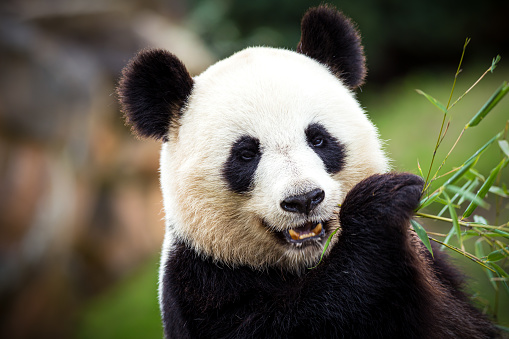

In [3]:
img = Image.open(img_path)
img

In [4]:
model = ViT('B_16_imagenet1k', pretrained=True)

Loaded pretrained weights.


In [5]:
model.image_size

(384, 384)

In [6]:
tfms = transforms.Compose([
    transforms.Resize(model.image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5],)
]) 
img = tfms(img)
img

tensor([[[-0.6549, -0.6549, -0.6392,  ..., -0.9765, -0.9765, -0.9765],
         [-0.6471, -0.6471, -0.6314,  ..., -0.9765, -0.9765, -0.9765],
         [-0.6392, -0.6392, -0.6235,  ..., -0.9765, -0.9765, -0.9765],
         ...,
         [-0.8431, -0.8353, -0.8196,  ..., -0.5451, -0.5529, -0.5922],
         [-0.8431, -0.8431, -0.8275,  ..., -0.5608, -0.5686, -0.6078],
         [-0.8510, -0.8431, -0.8275,  ..., -0.5922, -0.6078, -0.6471]],

        [[-0.6941, -0.6941, -0.6784,  ..., -0.9686, -0.9686, -0.9686],
         [-0.6863, -0.6863, -0.6706,  ..., -0.9686, -0.9686, -0.9686],
         [-0.6784, -0.6784, -0.6627,  ..., -0.9686, -0.9686, -0.9686],
         ...,
         [-0.8980, -0.8902, -0.8745,  ..., -0.5765, -0.5765, -0.6078],
         [-0.8980, -0.8980, -0.8824,  ..., -0.5922, -0.5922, -0.6235],
         [-0.9059, -0.8980, -0.8824,  ..., -0.6314, -0.6392, -0.6706]],

        [[-0.7176, -0.7176, -0.7020,  ..., -1.0000, -1.0000, -1.0000],
         [-0.7098, -0.7098, -0.6941,  ..., -1

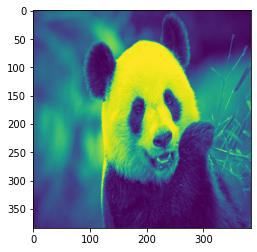

In [12]:
import matplotlib.pyplot as plt

plt.imshow(img[0].view(384,384))
plt.show()

In [16]:
img.shape

torch.Size([3, 384, 384])

In [17]:
img = img.unsqueeze(0)

In [19]:
img

tensor([[[[-0.6549, -0.6549, -0.6392,  ..., -0.9765, -0.9765, -0.9765],
          [-0.6471, -0.6471, -0.6314,  ..., -0.9765, -0.9765, -0.9765],
          [-0.6392, -0.6392, -0.6235,  ..., -0.9765, -0.9765, -0.9765],
          ...,
          [-0.8431, -0.8353, -0.8196,  ..., -0.5451, -0.5529, -0.5922],
          [-0.8431, -0.8431, -0.8275,  ..., -0.5608, -0.5686, -0.6078],
          [-0.8510, -0.8431, -0.8275,  ..., -0.5922, -0.6078, -0.6471]],

         [[-0.6941, -0.6941, -0.6784,  ..., -0.9686, -0.9686, -0.9686],
          [-0.6863, -0.6863, -0.6706,  ..., -0.9686, -0.9686, -0.9686],
          [-0.6784, -0.6784, -0.6627,  ..., -0.9686, -0.9686, -0.9686],
          ...,
          [-0.8980, -0.8902, -0.8745,  ..., -0.5765, -0.5765, -0.6078],
          [-0.8980, -0.8980, -0.8824,  ..., -0.5922, -0.5922, -0.6235],
          [-0.9059, -0.8980, -0.8824,  ..., -0.6314, -0.6392, -0.6706]],

         [[-0.7176, -0.7176, -0.7020,  ..., -1.0000, -1.0000, -1.0000],
          [-0.7098, -0.7098, -

In [21]:
with torch.no_grad():
    outputs = model(img).squeeze(0)

In [25]:
pred = torch.argmax(outputs)

In [27]:
labels_map = json.load(open('labels_map.txt'))
labels_map

a',
 '342': 'wild boar, boar, Sus scrofa',
 '343': 'warthog',
 '344': 'hippopotamus, hippo, river horse, Hippopotamus amphibius',
 '345': 'ox',
 '346': 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis',
 '347': 'bison',
 '348': 'ram, tup',
 '349': 'bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis',
 '350': 'ibex, Capra ibex',
 '351': 'hartebeest',
 '352': 'impala, Aepyceros melampus',
 '353': 'gazelle',
 '354': 'Arabian camel, dromedary, Camelus dromedarius',
 '355': 'llama',
 '356': 'weasel',
 '357': 'mink',
 '358': 'polecat, fitch, foulmart, foumart, Mustela putorius',
 '359': 'black-footed ferret, ferret, Mustela nigripes',
 '360': 'otter',
 '361': 'skunk, polecat, wood pussy',
 '362': 'badger',
 '363': 'armadillo',
 '364': 'three-toed sloth, ai, Bradypus tridactylus',
 '365': 'orangutan, orang, orangutang, Pongo pygmaeus',
 '366': 'gorilla, Gorilla gorilla',
 '367': 'chimpanzee, chimp, Pan troglodytes',
 '368': 'gibbon, Hylob

In [28]:
labels_map = [labels_map[key] for key in labels_map]

In [31]:
labels_map[pred]

'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca'

In [32]:
model

ViT(
  (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (positional_embedding): PositionalEmbedding1D()
  (transformer): Transformer(
    (blocks): ModuleList(
      (0): Block(
        (attn): MultiHeadedSelfAttention(
          (proj_q): Linear(in_features=768, out_features=768, bias=True)
          (proj_k): Linear(in_features=768, out_features=768, bias=True)
          (proj_v): Linear(in_features=768, out_features=768, bias=True)
          (drop): Dropout(p=0.1, inplace=False)
        )
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (pwff): PositionWiseFeedForward(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (drop): Dropout(p=0.1, inplace=False)
      )
      (1): Block(
 